In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import copy

# Round 2

In [2]:
# Reading files
data = pd.read_csv("./files_for_lab/csv_files/marketing_customer_analysis.csv")

In [3]:
# 1. Show the dataframe shape.
print(data.shape)

(10910, 26)


In [4]:
# 2. Standardize header names.

# I first drop the old index column
data = data.drop(['Unnamed: 0'],axis=1)

In [5]:
data.columns = list(map(lambda x: x.lower(), data.columns))
data.columns = data.columns.str.replace(' ','_')

In [6]:
data.select_dtypes(np.number)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [7]:
data.select_dtypes(object)

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [8]:
# check and deal with NaN
#data[data.isna().any(axis=1)] 
# It seems we have a lot of NaNs. Most of them come from vehicle_type, we're missing 
# that data for half of the rows so I think I will just drop the column

#vehicle_type = data['vehicle_type'] # I'm not sure if I will need it later. 
#data=data.drop(['vehicle_type'],axis=1)

#Guessing NaN is manual
data['vehicle_type']=data['vehicle_type'].fillna('M')

In [9]:
data.isna().sum()

customer                           0
state                            631
customer_lifetime_value            0
response                         631
coverage                           0
education                          0
effective_to_date                  0
employmentstatus                   0
gender                             0
income                             0
location_code                      0
marital_status                     0
monthly_premium_auto               0
months_since_last_claim          633
months_since_policy_inception      0
number_of_open_complaints        633
number_of_policies                 0
policy_type                        0
policy                             0
renew_offer_type                   0
sales_channel                      0
total_claim_amount                 0
vehicle_class                    622
vehicle_size                     622
vehicle_type                       0
dtype: int64

In [10]:
# Filling the categorical NaN with mode values
categ_nan_cols = data.select_dtypes(object).isna().sum()>0 #list of booleans
categ_nan_cols = categ_nan_cols[categ_nan_cols] #choosing only TRUE columns
categ_nan_cols = list(categ_nan_cols.index.values) #getting the column names
    
for column in categ_nan_cols:
    data[column] = data[column].fillna(data[column].mode()[0])
    
# Filling the numerical NaN with median values
num_nan_cols = data.select_dtypes(np.number).isna().sum()>0
num_nan_cols = num_nan_cols[num_nan_cols]
num_nan_cols = list(num_nan_cols.index.values)
    
for column in num_nan_cols:
    data[column]=data[column].fillna(data[column].mean())

In [11]:
# converting to datetime format
data['effective_to_date']=pd.to_datetime(data['effective_to_date'])

In [12]:
#auxiliar function for the month extraction
def extract_month(date):
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    return months[date.month-1]

In [13]:
# Creating "month" attribute through the extract_month function
data['month']=data['effective_to_date'].apply(extract_month)

# Easier way I found later
# data['month']=data['effective_to_date'].dt.month_name()

In [14]:
# filter only for January, February and March
data[data['month'].isin(['January','February','March'])]
# I think we only have data for Jan and Feb since the number of rows looks the same. 

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,February
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,January
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,M,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,January
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,January
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,M,February
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,February


In [15]:
# Round 2 doesn't state it but I think we also needed to filter out
# negative and zero incomes
data = data[data['income']>0]

# bonus function

In [16]:
file_location = "./files_for_lab/csv_files/marketing_customer_analysis.csv"
def bonus(file_loc):
    
    #auxiliar function for the month extraction
    def extract_month(date):
        months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
        return months[date.month-1]

    # reading file
    data = pd.read_csv(file_loc)
    
    print('Printing datashape'),print(data.shape)
    
    #dropping old index
    data = data.drop(['Unnamed: 0'],axis=1)
    
    #to snake_case
    data.columns = list(map(lambda x: x.lower(), data.columns))
    data.columns = data.columns.str.replace(' ','_')
    
    print('\nPrinting numerical data'),print(data.select_dtypes(np.number).head(3))
    print('\n\nPrinting categorical data'),print(data.select_dtypes(object).head(3))
    
    # I drop this column tho I'm not sure it's the right way to approach
    # the problem.
    data=data.drop(['vehicle_type'],axis=1)
    
    # Filling the categorical NaN with mode values
    categ_nan_cols = data.select_dtypes(object).isna().sum()>0 #list of booleans
    categ_nan_cols = categ_nan_cols[categ_nan_cols] #choosing only TRUE columns
    categ_nan_cols = list(categ_nan_cols.index.values) #getting the column names
    
    for column in categ_nan_cols:
        breakpoint()
        data[column] = data[column].fillna(data[column].mode()[0])
    
    # Filling the numerical NaN with median values
    num_nan_cols = data.select_dtypes(np.number).isna().sum()>0
    num_nan_cols = num_nan_cols[num_nan_cols]
    num_nan_cols = list(num_nan_cols.index.values)
    
    for column in num_nan_cols:
        data[column]=data[column].fillna(data[column].mean())
    
    #Converting to datetime
    data['effective_to_date']=pd.to_datetime(data['effective_to_date'])
    
    # Creating "month" attribute through the extract_month function
    data['month']=data['effective_to_date'].apply(extract_month)

        
    # Finally filtering data for Jan,Feb,March
    data = data[data['month'].isin(['January','February','March'])]

    # Round 2 doesn't state it but I think we also needed to filter out
    # negative and zero incomes
    data = data[data['income']>0]
    
    return data


bonus(file_location)

Printing datashape
(10910, 26)

Printing numerical data
   customer_lifetime_value  income  monthly_premium_auto  \
0              4809.216960   48029                    61   
1              2228.525238       0                    64   
2             14947.917300   22139                   100   

   months_since_last_claim  months_since_policy_inception  \
0                      7.0                             52   
1                      3.0                             26   
2                     34.0                             31   

   number_of_open_complaints  number_of_policies  total_claim_amount  
0                        0.0                   9          292.800000  
1                        0.0                   1          744.924331  
2                        0.0                   2          480.000000  


Printing categorical data
  customer       state response coverage education effective_to_date  \
0  DK49336     Arizona       No    Basic   College           2/18/11   
1 

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,February
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,February
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,January
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,0.384256,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,January
5,HO81102,California,4745.181764,No,Basic,High School or Below,2011-02-14,Employed,M,50549,...,0.000000,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,PP30874,California,3579.023825,No,Extended,High School or Below,2011-01-24,Employed,F,28304,...,2.000000,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,January
10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,4.000000,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,January
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,0.000000,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,January
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,0.000000,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,February


# round 3

In [17]:
#show dataframe info
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,February
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,M,January
5,HO81102,California,4745.181764,No,Basic,High School or Below,2011-02-14,Employed,M,50549,...,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,A,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,PP30874,California,3579.023825,No,Extended,High School or Below,2011-01-24,Employed,F,28304,...,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,A,January
10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A,January
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,January
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,M,February


In [18]:
#describe dataframe
data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,8123.0,8156.394064,6999.969560,2119.894333,4110.908596,5807.659307,9075.768214,83325.381190
income,8123.0,50414.978087,24260.858125,10037.000000,28422.000000,48156.000000,70060.000000,99981.000000
monthly_premium_auto,8123.0,92.996430,34.644927,61.000000,68.000000,83.000000,109.000000,297.000000
months_since_last_claim,8123.0,15.101086,9.788179,0.000000,7.000000,15.000000,23.000000,35.000000
months_since_policy_inception,8123.0,47.856334,27.902302,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,8123.0,0.382815,0.881496,0.000000,0.000000,0.000000,0.384256,5.000000
number_of_policies,8123.0,2.962452,2.403456,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,8123.0,377.910109,251.933134,0.099007,213.032940,340.800000,499.200000,2893.239678


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8123 entries, 0 to 10908
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       8123 non-null   object        
 1   state                          8123 non-null   object        
 2   customer_lifetime_value        8123 non-null   float64       
 3   response                       8123 non-null   object        
 4   coverage                       8123 non-null   object        
 5   education                      8123 non-null   object        
 6   effective_to_date              8123 non-null   datetime64[ns]
 7   employmentstatus               8123 non-null   object        
 8   gender                         8123 non-null   object        
 9   income                         8123 non-null   int64         
 10  location_code                  8123 non-null   object        
 11  marital_status  

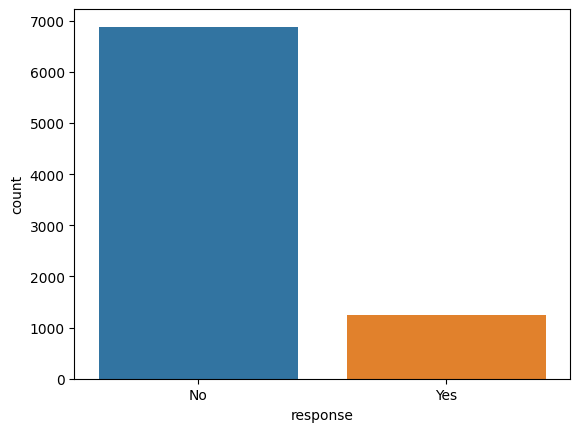

In [20]:
# Show a plot of the total number of responses.

# From here onwards I have no idea which graphs I should be doing.
sns.countplot(x = "response", data=data)
plt.show()

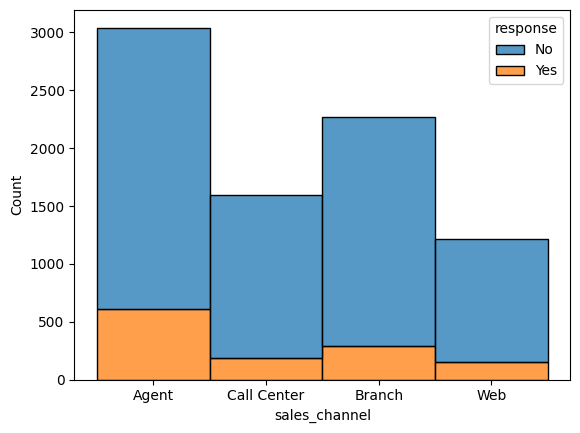

In [21]:
# Show a plot of the response rate by the sales channel.
sns.histplot(binwidth=0.5, x="sales_channel", hue="response", data=data, stat="count", multiple="stack")

#ERIN
#sns.countplot(x="sales_channel", hue="response", data=data)

# # ERIN: she creates a column = 1 if Yes, = 0 if no. When plotting
# we see the mean values which is equal to the percent of Yes.
# data['response_rate'] = np.where(data.response=='Yes',1,0)
# data.groupby('sales_channel')['response_rate'].mean().plot.bar() #ERIN1
#sns.barplot(x='sales_channel',y='response_rate',data=data) #ERIN2

plt.show()

# Total claim amount

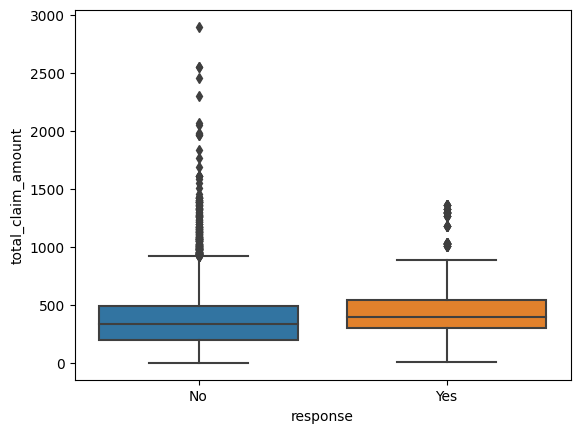

In [22]:
# Show a plot of the response rate by the total claim amount.
sns.boxplot(x='response',y='total_claim_amount',data=data)
plt.show()

In [23]:
# # ERIN bins the tota_claim_amount 
# def tca_bins(x):
#     if x <=450:
#         return 1
#     elif x<=900:
#         return 2
#     elif x<=1350:
#         return 3
#     elif x<=1800:
#         return 4
#     else:
#         return 5
    
# data['total_claim_amount_bins'] = list(map(tca_bins, data['total_claim_amount']))
# data.groupby('total_claim_amount_bins')['response_rate'].mean().plot.bar()

In [24]:
#erin sns.barplot(x='total_claim_amount_bins',y='response_rate',data=data)

# RESPONSE RATE - INCOME

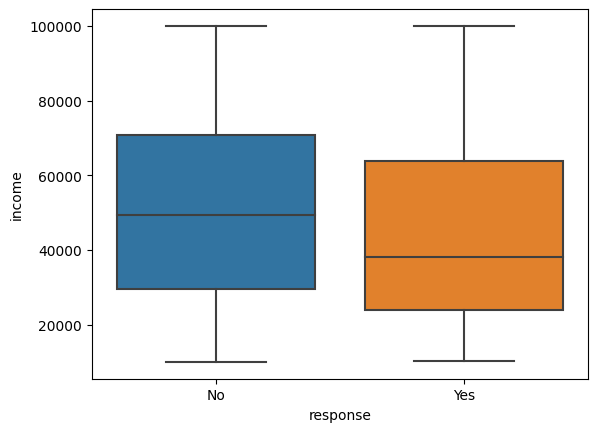

In [25]:
#Show a plot of the response rate by income.
sns.boxplot(x='response', y='income', data=data)
plt.show()

# Round 3 
Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. 

In [107]:
numerical_data = data.select_dtypes(np.number)
categorical_data = data.select_dtypes(object)

### Use seaborn library to construct distribution plots for the numerical variables

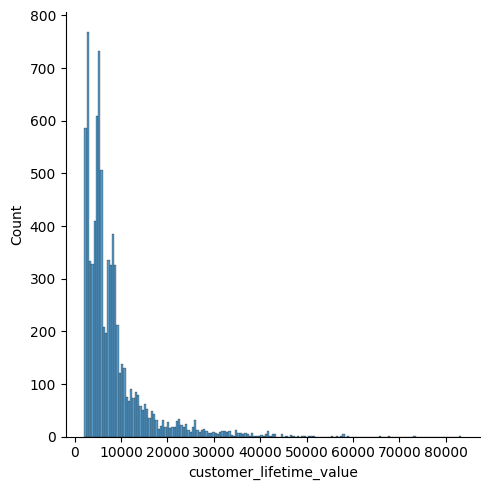

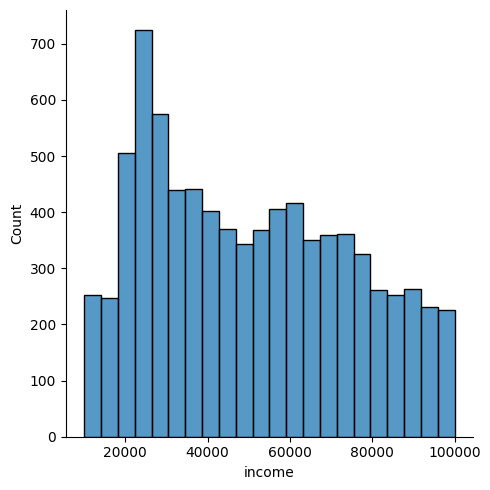

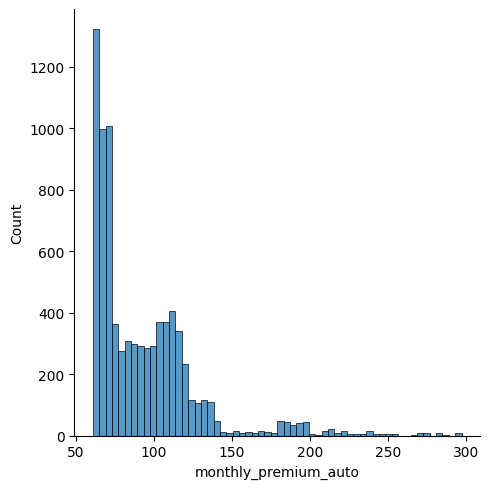

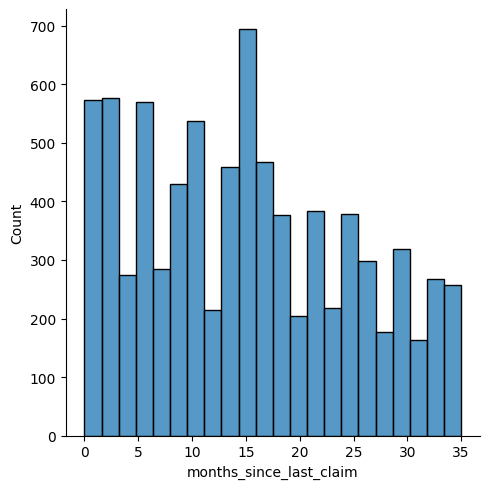

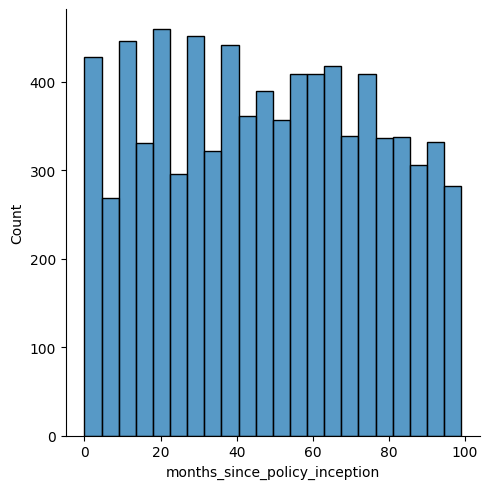

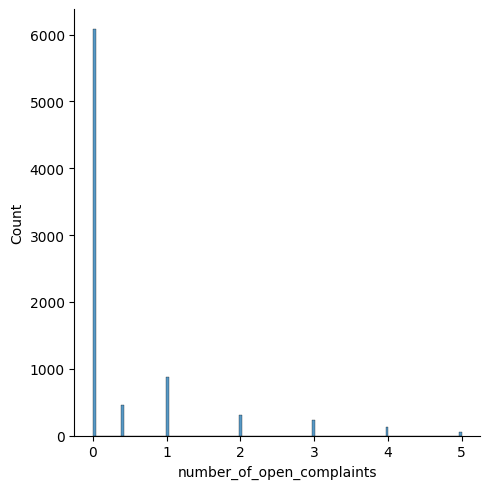

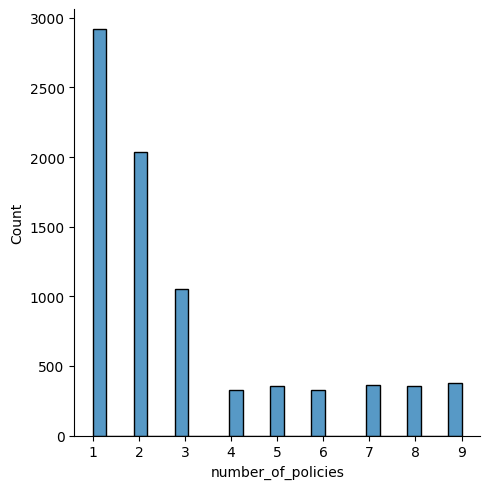

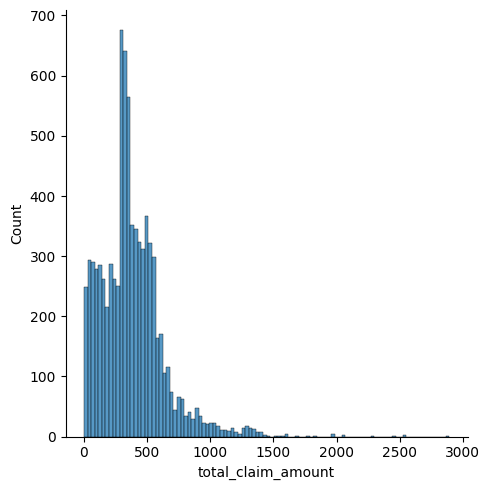

In [39]:
for column in numerical_data.columns:
    sns.displot(numerical_data[column])
plt.show()

### Use Matplotlib to construct histograms (I think this is the same)

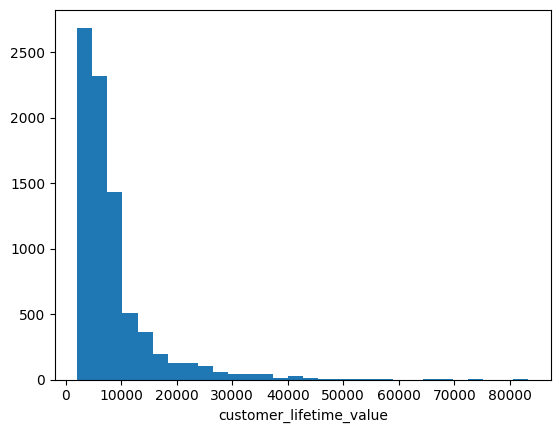

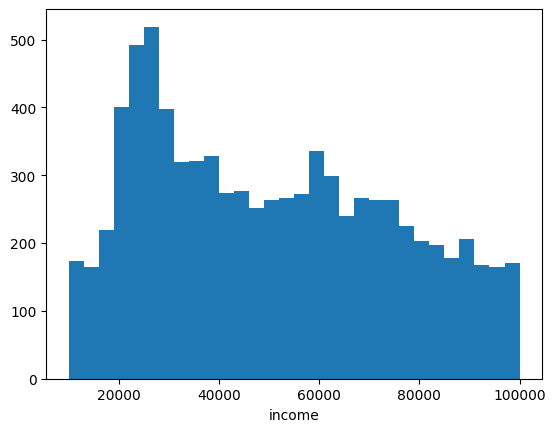

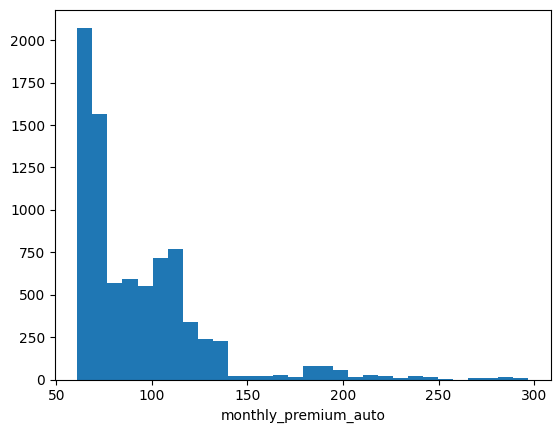

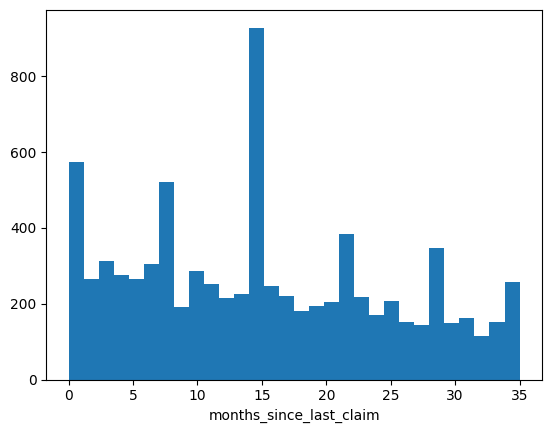

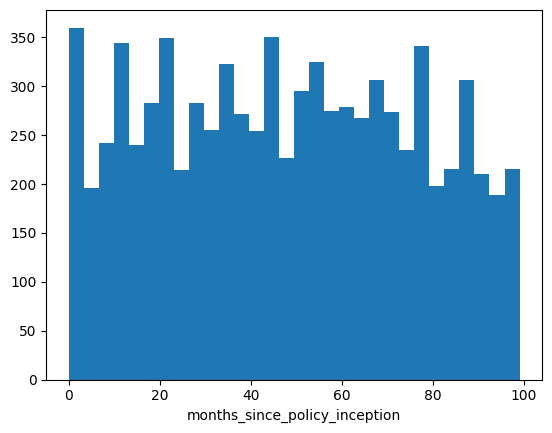

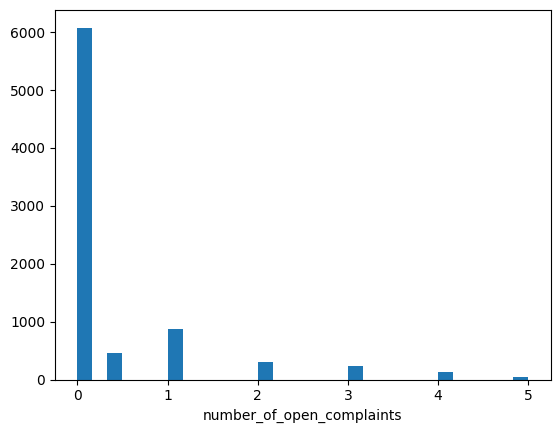

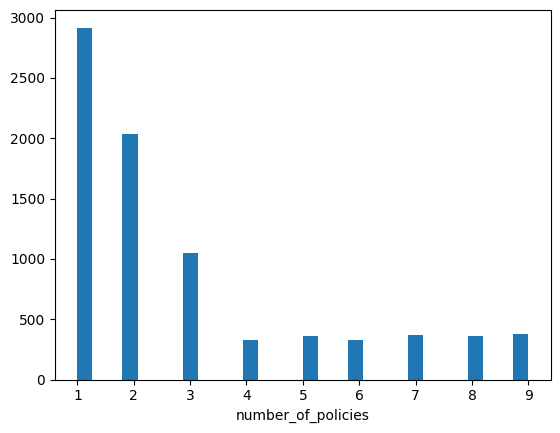

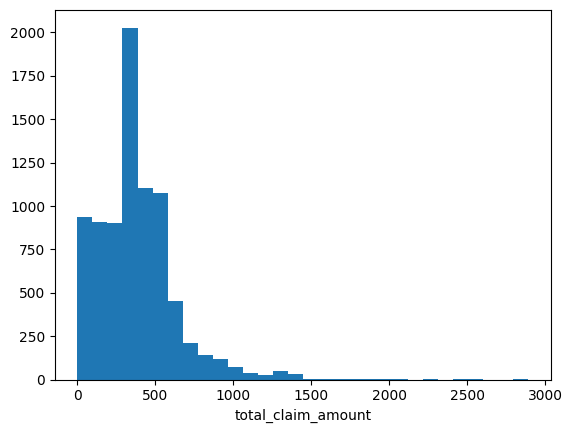

In [51]:
for column in numerical_data.columns:
    plt.figure()
    plt.hist(numerical_data[column],bins=30)
    plt.xlabel(column)
plt.show()

### Do the distributions for different numerical variables look like a normal distribution

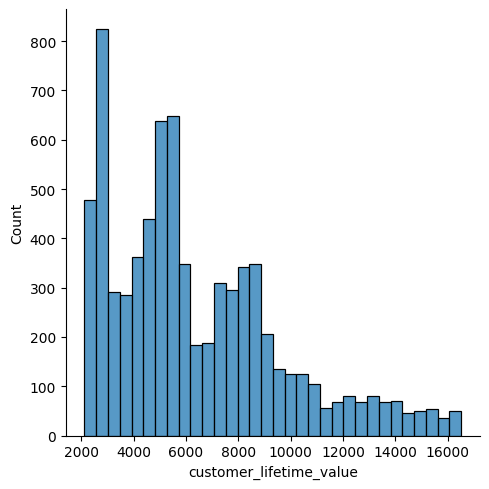

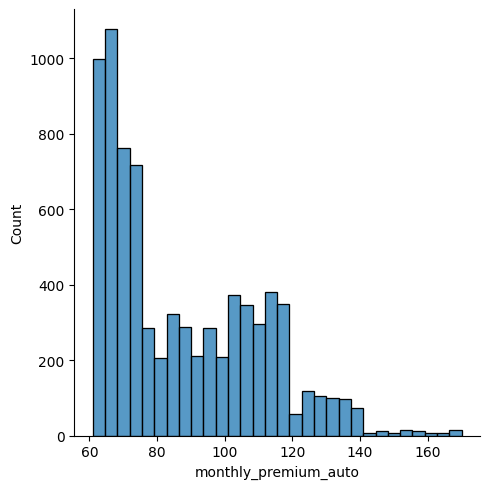

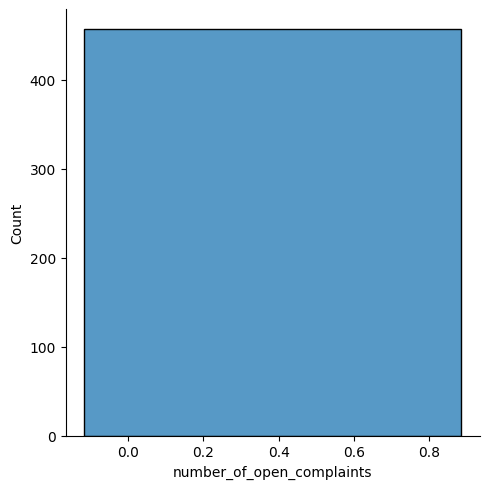

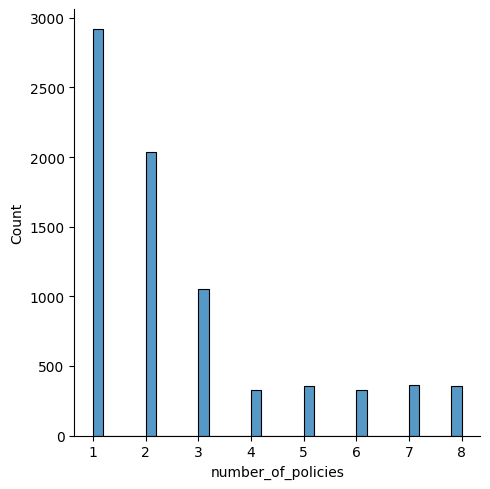

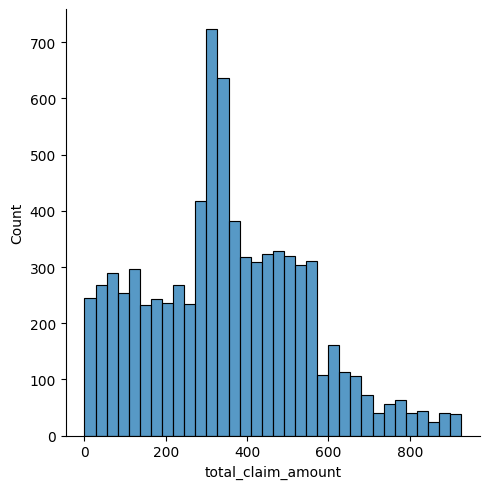

In [91]:
# I'll try to remove raw potencial outliers even if they're not,
# just to see with a general rule to see if the distribution changes.
ratio = 1.5
non_normal = ['customer_lifetime_value', 'monthly_premium_auto', 'number_of_open_complaints', 'number_of_policies', 'total_claim_amount']

for column in non_normal:
    itqr = np.quantile(numerical_data[column],0.75)-np.quantile(numerical_data[column],0.25)
    lower_limit = max(0,np.quantile(numerical_data[column],0.25)-ratio*itqr)
    upper_limit = np.quantile(numerical_data[column],0.75)+ratio*itqr
    data_column = numerical_data[column][(numerical_data[column]>lower_limit) & (numerical_data[column]<upper_limit)]
    
    sns.displot(data_column)
plt.show()

# total-claim_amount looks more as a normal distribution now.

# The rest of columns doesn't. And number of open complaints is messed up
# because I already had a lot of zeros, and I fill the NA with the 
# mean which is close to zero. I think that by filling NAs, I'm making
# edge points look more outlier-ish? So in the end I removed too many
# legit points and I'm left with zeros, and the decimal points
# 0.~that come from filling NAs.

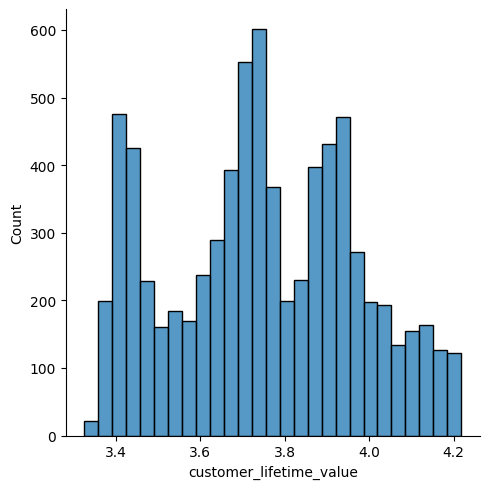

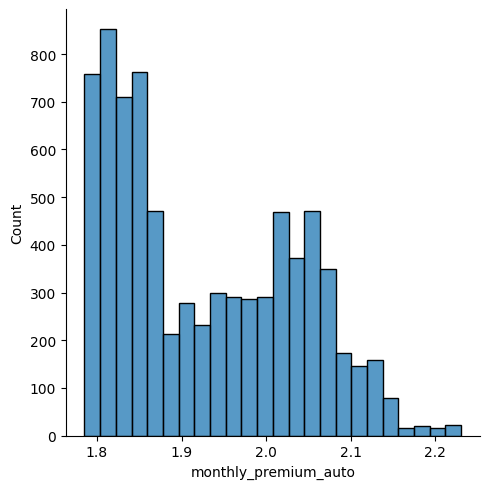

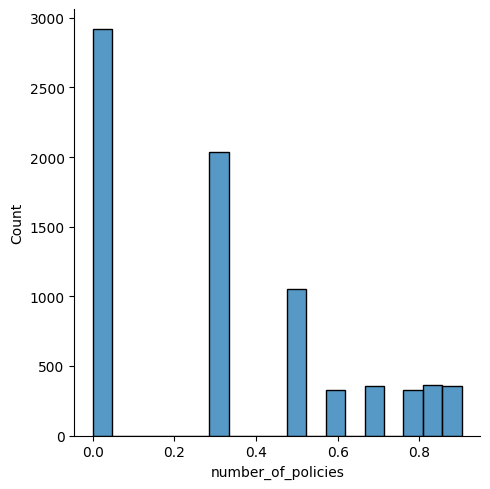

In [92]:
# -----------------------------------
# This is a copy of the cell above, but now I'm going to make it a log scale
ratio = 1.5
non_normal = ['customer_lifetime_value', 'monthly_premium_auto', 'number_of_policies']

def f_log(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0

for column in non_normal:
    itqr = np.quantile(numerical_data[column],0.75)-np.quantile(numerical_data[column],0.25)
    lower_limit = max(0,np.quantile(numerical_data[column],0.25)-ratio*itqr)
    upper_limit = np.quantile(numerical_data[column],0.75)+ratio*itqr
    data_column = numerical_data[column][(numerical_data[column]>lower_limit) & (numerical_data[column]<upper_limit)]
    
    sns.displot(data_column.apply(f_log))
plt.show()

# now customer_lifetime_value looks more normal through
# it has 3 bumps, so its either not normal or a combination of three

### For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

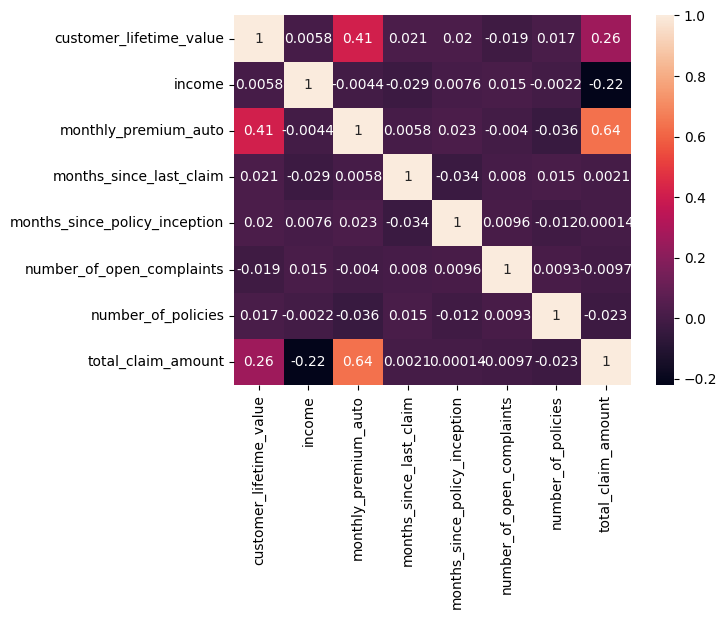

In [94]:
sns.heatmap(numerical_data.corr(), annot=True)
plt.show()
# It doesn't look as if we had dependant X columns.

### X-y split.

In [98]:
X = numerical_data.drop('total_claim_amount',axis=1)
y = numerical_data['total_claim_amount']

### Normalize (numerical).

In [105]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
transformer = MinMaxScaler().fit(X)
X_normalized = transformer.transform(X)
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)
X_normalized.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,8123.0,0.074336,0.086201,0.0,0.024518,0.045413,0.085658,1.0
income,8123.0,0.448924,0.269733,0.0,0.204405,0.423808,0.667337,1.0
monthly_premium_auto,8123.0,0.135578,0.146801,0.0,0.029661,0.093220,0.203390,1.0
months_since_last_claim,8123.0,0.431460,0.279662,0.0,0.200000,0.428571,0.657143,1.0
months_since_policy_inception,8123.0,0.483397,0.281841,0.0,0.242424,0.484848,0.717172,1.0
number_of_open_complaints,8123.0,0.076563,0.176299,0.0,0.000000,0.000000,0.076851,1.0
number_of_policies,8123.0,0.245307,0.300432,0.0,0.000000,0.125000,0.375000,1.0
